<a href="https://colab.research.google.com/github/Deividasbu/US-2012-President-Elections/blob/main/2016%20US%20Elections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2016 US Presidential Elections**

## Requirements

- Perform data cleaning and feature engineering. Work with features - handle missing data if needed, use Pandas date APIs, create other additional features.
- Perform exploratory data analysis. Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data. Grouping the data and analyzing the groups - using Pandas aggregate methods. Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Present the project - the data, methods, and results.
- Provide suggestions about how your analysis can be improved.

## Bonus Challenges

As a data scientists you will spend significant amount of your time learning new things.
Sometimes you will do that for fun, but most of the time you will have an urgent problem and you will need to quickly learn some new skill to be able to solve it.
It is very important to gradually build this skill - it is extremely valuable for all data scientists.
The bonus challenges are designed to simulate these types of situations.
These challenges require you to do something that we haven't covered in the course yet.
Instead of trying to do all of the bonus challenges, concentrate on just one or two and do them well.
All of the bonus challenges are optional - no points will be deducted if you skip them.

- Try dimensionality reduction algorithm (e.g. PCA, t-SNE, Autoencoder).
- Try clustering your data.
- Try a machine learning model to explain relationships between features and predict new values.
- Try to use a statistical significance test.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structure? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?
- Delivery of the presentation. How clear are your reasoning and explanations?
- Bonus challenges. Have you put extra effort to do one or more of the bonus challenges (no points will be deducted if you skip them)?


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
county = pd.read_csv('county_facts.csv')
results = pd.read_csv('primary_results.csv')
del results['fips']

## **Exploratory Data Analysis**

In [ ]:
county.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1,84.9,12.9,20.7,86.0,28.8,21263779,25.5,133957180,64.9,26.0,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,24.2,2207912,69.7,15.9,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6,85.0,1.6,3.5,85.6,20.9,5922,26.2,22751,76.8,8.3,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6,84.8,2.9,5.0,73.7,13.4,2120,24.6,11799,67.7,10.6,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [ ]:
results.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,Democrat,Bernie Sanders,222,0.078


In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24611 entries, 0 to 24610
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               24611 non-null  object 
 1   state_abbreviation  24611 non-null  object 
 2   county              24611 non-null  object 
 3   party               24611 non-null  object 
 4   candidate           24611 non-null  object 
 5   votes               24611 non-null  int64  
 6   fraction_votes      24611 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.3+ MB


### Total votes received by Democrats

In [ ]:
democrats = results[results['party'] == 'Democrat']
total_demo = democrats.groupby(['candidate'])['votes'].sum().sort_values(ascending=False)
total_demo.head()

candidate
Hillary Clinton    15692452
Bernie Sanders     11959102
 No Preference         8152
Martin O'Malley         752
 Uncommitted             43
Name: votes, dtype: int64

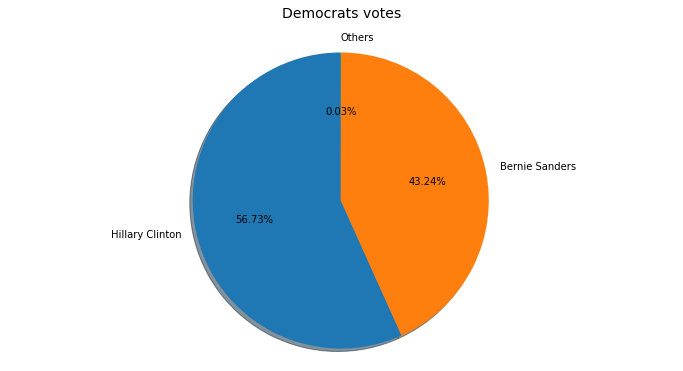

In [ ]:
total_demo_df = pd.DataFrame(
    data = {'candidate': total_demo.index, 'value' :total_demo.values})

top_demo = total_demo_df[:2].copy()
others = pd.DataFrame(data = {
    'candidate' : ['Others'],
    'value' : [total_demo_df['value'][2:].sum()]
})

top_demo = pd.concat([top_demo, others])

fig1, ax1 = plt.subplots(figsize = (12,6))
ax1.pie(top_demo['value'], labels=top_demo['candidate'], 
        autopct='%1.2f%%', shadow=True, startangle=90)
ax1.set_title('Democrats votes', pad=20, size=14)
ax1.axis('equal');

### Total votes received by Republicans

In [ ]:
republicans = results[results['party'] == 'Republican']
total_repub = republicans.groupby(['candidate'])['votes'].sum().sort_values(ascending=False)
total_repub

candidate
Donald Trump      13302541
Ted Cruz           7603006
John Kasich        4159949
Marco Rubio        3321076
Ben Carson          564553
Jeb Bush             94411
Chris Christie       24353
Carly Fiorina        15191
Rand Paul             8479
Mike Huckabee         3345
Rick Santorum         1782
Name: votes, dtype: int64

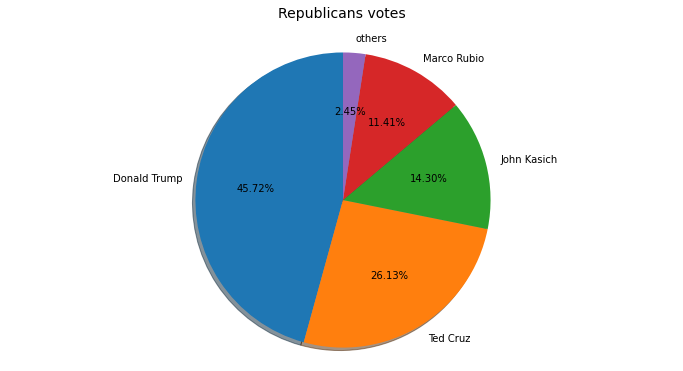

In [ ]:
total_repub_df = pd.DataFrame(
    data = {'candidate': total_repub.index, 'value' :total_repub.values})

top_repub = total_repub_df[:4].copy()
others = pd.DataFrame(data = {
    'candidate' : ['others'],
    'value' : [total_repub_df['value'][4:].sum()]
})

top_repub = pd.concat([top_repub, others])

fig1, ax1 = plt.subplots(figsize = (12,6))
ax1.pie(top_repub['value'], labels=top_repub['candidate'], autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.set_title('Republicans votes', pad=20, size=14)
ax1.axis('equal');

### Democrats and Republicans Elections. Candidates separability based on voters demographics

In [ ]:
#one winner per county in repulicans elections
idx = republicans.groupby(['state_abbreviation', 'county'])['votes'].transform(max) == republicans['votes']
winners_repub = republicans[idx]

#one winner county in democrats elections
idx2 = democrats.groupby(['state_abbreviation', 'county'])['votes'].transform(max) == democrats['votes'] 
winners_demo = democrats[idx2]

In [ ]:
#modifying demographics data frame to have relevant columns and its names
demographics = county[['state_abbreviation', 'area_name', 'RHI825214', 'RHI225214', 'RHI725214', 'EDU685213', 
                       'INC110213', 'PVY020213', 'AGE775214', 'POP645213', 'SEX255214']]
demographics.columns = ['state_abbreviation', 'county', 'White', 'Black or African American', 
                        'Hispanic', 'College', 'Income', 'Poverty', 'Age_65+', 'Foreign_born', 'Female'] 
demographics.head()

,state_abbreviation,county,White,Black or African American,Hispanic,College,Income,Poverty,Age_65+,Foreign_born,Female
0,NaN,United States,62.1,13.2,17.4,28.8,53046,15.4,14.5,12.9,50.8
1,NaN,Alabama,66.2,26.7,4.1,22.6,43253,18.6,15.3,3.5,51.5
2,AL,Autauga County,75.6,18.7,2.7,20.9,53682,12.1,13.8,1.6,51.4
3,AL,Baldwin County,83.0,9.6,4.6,27.7,50221,13.9,18.7,3.6,51.2
4,AL,Barbour County,46.6,47.6,4.5,13.4,32911,26.7,16.5,2.9,46.6


In [ ]:
# merging demographics data with republicans winners
demographics_copy = demographics.copy()
demographics_copy['county'] = demographics['county'].str.replace(' County', '')

# merging filtered data to demographics
combined_repub_win = pd.merge(winners_repub, demographics_copy, how="inner", on=["state_abbreviation", "county"])
combined_demo_win = pd.merge(winners_demo, demographics_copy, how="inner", on=["state_abbreviation", "county"])
combined_repub_win.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,White,Black or African American,Hispanic,College,Income,Poverty,Age_65+,Foreign_born,Female
0,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,75.6,18.7,2.7,20.9,53682,12.1,13.8,1.6,51.4
1,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,83.0,9.6,4.6,27.7,50221,13.9,18.7,3.6,51.2
2,Alabama,AL,Barbour,Republican,Donald Trump,1710,0.501,46.6,47.6,4.5,13.4,32911,26.7,16.5,2.9,46.6
3,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,74.5,22.1,2.1,12.1,36447,18.1,14.8,1.2,45.9
4,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,87.8,1.8,8.7,12.1,44145,15.8,17.0,4.3,50.5


#### Republicans candidates' voters separability

In [ ]:
combined_repub_win.groupby(['candidate'])['Income', 'College', 'Poverty', 'White',  
                                          'Black or African American', 'Hispanic'].mean().round(2)

,Income,College,Poverty,White,Black or African American,Hispanic
candidate,,,,,,
Ben Carson,31104.50,13.35,26.90,43.65,1.05,53.80
Donald Trump,44257.39,18.67,17.58,78.32,10.55,6.82
John Kasich,50012.64,21.71,14.33,86.59,5.43,4.94
Marco Rubio,63645.03,40.24,14.34,61.86,17.02,13.83
Ted Cruz,46776.45,19.53,16.01,72.46,5.90,17.70


In [ ]:
combined_repub_win.candidate.value_counts()

Donald Trump    1947
Ted Cruz         601
John Kasich       61
Marco Rubio       29
Ben Carson         2
Name: candidate, dtype: int64

There were two main opponents in Republicans elections - Donald Trump and Ted Cruz. Lets look at their voters separability

In [ ]:
candidates = ['Donald Trump', 'Ted Cruz']
two_winners_repub = combined_repub_win.loc[combined_repub_win['candidate'].isin(candidates)]

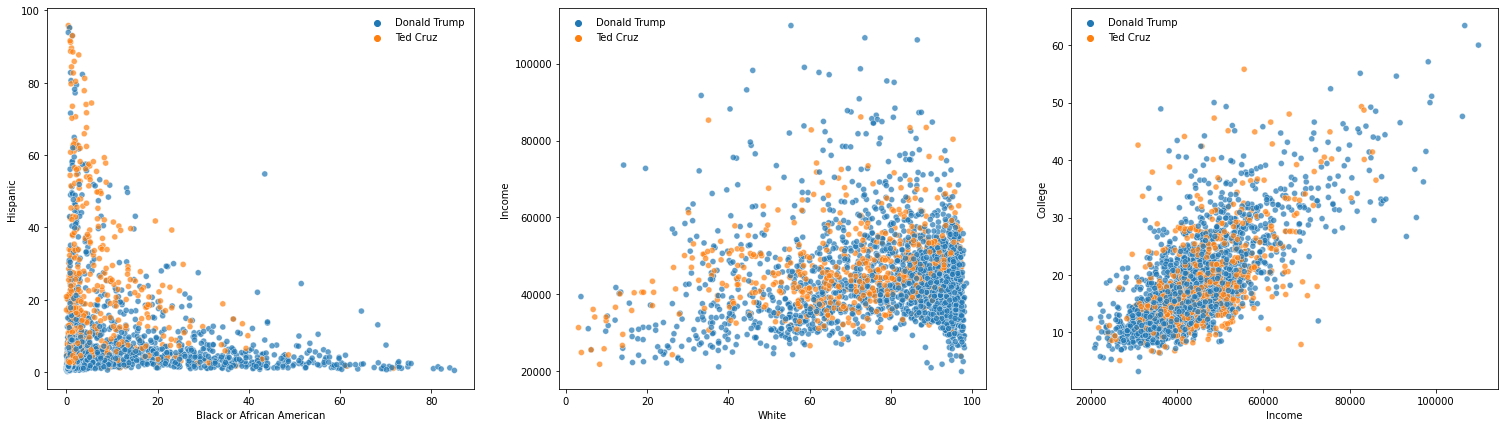

In [ ]:
plt.figure(figsize=(26,7))
plt.subplot(1,3,1)
sns.scatterplot(x='Black or African American', y='Hispanic', data=two_winners_repub, hue = 'candidate', alpha=0.7)
plt.legend(frameon=False)
plt.subplot(1,3,2)
sns.scatterplot(x='White', y='Income', data=two_winners_repub, hue='candidate', alpha=0.7)
plt.legend(frameon=False)
plt.subplot(1,3,3)
sns.scatterplot(x='Income', y='College', data=two_winners_repub, hue='candidate', alpha=0.7)
plt.legend(frameon=False)
plt.show()

#### Democrats candidates' voters separability

In [ ]:
combined_demo_win.groupby(['candidate'])['Income', 'College', 'Poverty', 'White',  
                                          'Black or African American', 'Hispanic'].mean().round(2)

,Income,College,Poverty,White,Black or African American,Hispanic
candidate,,,,,,
Bernie Sanders,46552.67,20.73,15.60,85.64,2.36,6.62
Hillary Clinton,44620.15,18.55,17.93,70.91,14.20,11.54


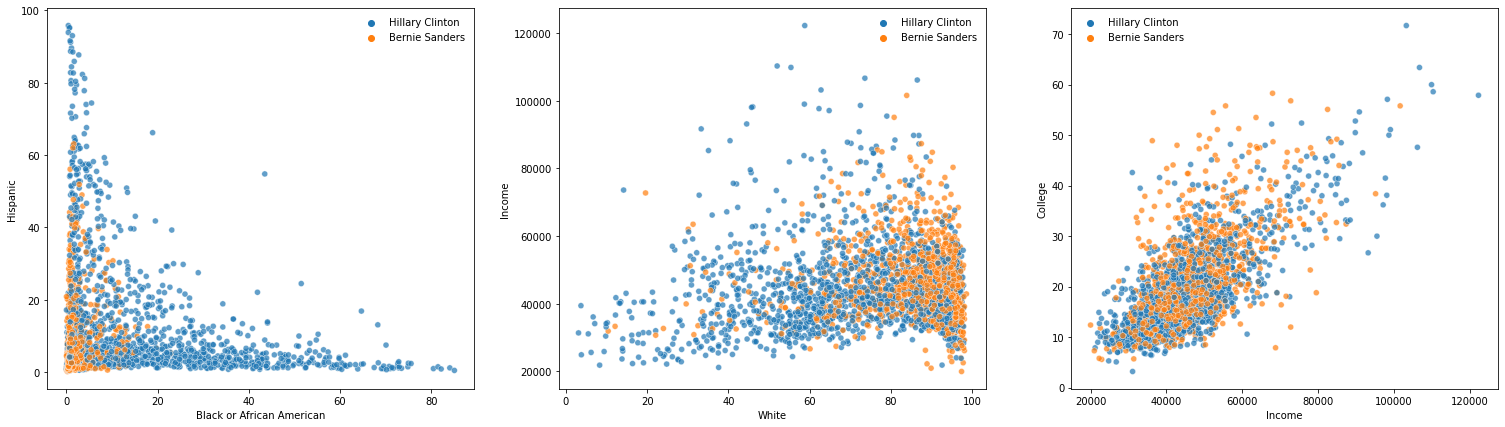

In [ ]:
plt.figure(figsize=(26,7))
plt.subplot(1,3,1)
sns.scatterplot(x='Black or African American', y='Hispanic', data=combined_demo_win, hue = 'candidate', alpha=0.7)
plt.legend(frameon=False)
plt.subplot(1,3,2)
sns.scatterplot(x='White', y='Income', data=combined_demo_win, hue = 'candidate', alpha=0.7)
plt.legend(frameon=False)
plt.subplot(1,3,3)
sns.scatterplot(x='Income', y='College', data=combined_demo_win, hue = 'candidate', alpha=0.7)
plt.legend(frameon=False)
plt.show()

### Insights  

**Republicans elections**

Donald Trump is supported more by black people - Ted Cruz by hispanic. 
Most of the Trump's supporters are white people with average income.
Marco Rubio wins in counties where average income is highest. 
There is no big difference between average Trump's and Rubio suporters income and education level.   

**Democrat elections**
  
Bernie Sanders has way less hispanic and black people among his supporters than Hillary - most of them are white.   
Hilllary's votters on average has lower income and education compared to Sanders. 



### Most supporting counties/states of both parties.

In [ ]:
total_votes_county = results.groupby(['state_abbreviation', 'county'])['votes'].transform('sum')
results['fraction_total_votes'] = results['votes'] / total_votes_county

In [ ]:
idx3 = results.groupby(['state_abbreviation', 'county'])['votes'].transform(max) == results['votes']
winners = results[idx3]

combined_winners = pd.merge(winners, demographics_copy, how="inner", on=["state_abbreviation", "county"])
combined_winners = combined_winners[combined_winners['fraction_votes'] != 0]
trump_won = combined_winners[combined_winners['candidate'] == 'Donald Trump']
hillary_won = combined_winners[combined_winners['candidate'] == 'Hillary Clinton']

Here is how the filtering works. Only the candidate which received highest number of votes among both parties elections in the county is filtered out:  

![](https://drive.google.com/uc?export=view&id=1OOEOMU9674L2v65WsgIshiiWMqp-vRCh)  

#### Trump's top 5 states

In [ ]:
trump_won.groupby(['state'])['fraction_votes'].mean().sort_values(ascending = False)[:5] 

state
New Jersey       0.805556
California       0.805000
Washington       0.780231
West Virginia    0.779919
New Mexico       0.759333
Name: fraction_votes, dtype: float64

In [ ]:
states = ['NJ', 'WV', 'WA', 'CA','NM']
top_trump_states = trump_won.loc[trump_won['state_abbreviation'].isin(states)]

#### Hillary's top 5 states

In [ ]:
hillary_won.groupby(['state'])['fraction_votes'].mean().sort_values(ascending = False)[:5]

state
Mississippi       0.870368
South Carolina    0.828469
Georgia           0.818250
Alabama           0.809769
Tennessee         0.804800
Name: fraction_votes, dtype: float64

In [ ]:
states = ['MS','TN','SC', 'AL', 'GA']
top_hillary_states = hillary_won.loc[hillary_won['state_abbreviation'].isin(states)]

### Dependency of votes received based on demographics of Top 5 states

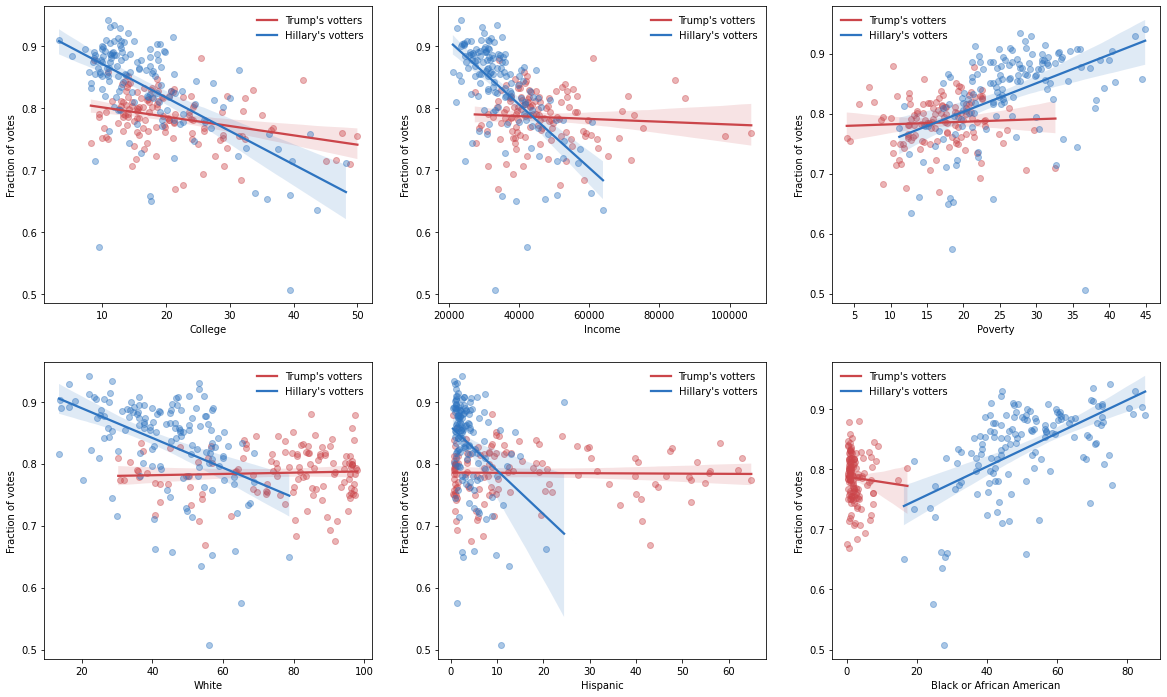

In [ ]:
colors = ["#CB454A", "#2E74C0"]
sns.set_palette(sns.color_palette(colors))

columns = ['College', 'Income', 'Poverty', 'White', 'Hispanic', 'Black or African American']

fig = plt.figure(figsize=(20,12))
position = 1

for i in columns:
    plt.subplot(2, 3, position)
    plt.xlabel(i)
    sns.regplot(data = top_trump_states, x = i, y = 'fraction_votes', scatter_kws={'alpha':0.4})
    sns.regplot(data = top_hillary_states, x = i, y = 'fraction_votes', scatter_kws={'alpha':0.4})
    plt.ylabel('Fraction of votes')
    plt.legend(labels=["Trump's votters", "Hillary's votters"], frameon=False,)
    position += 1


### Comparison of demographics between Trump's and Hillary's top states


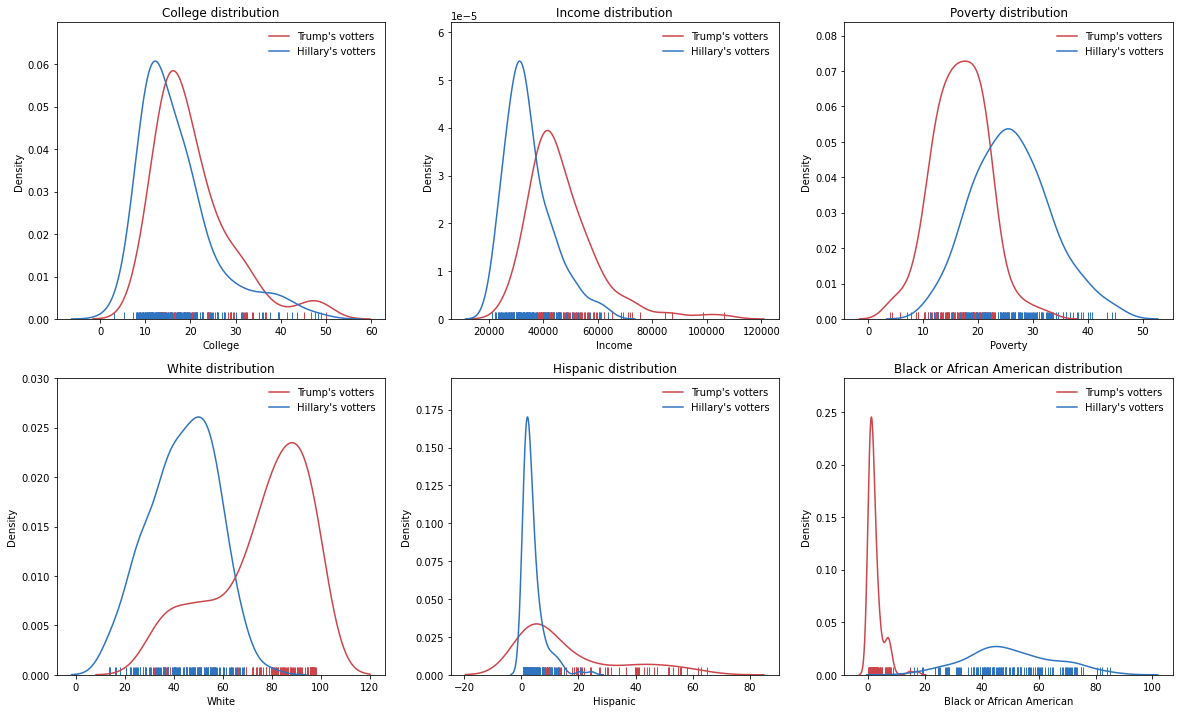

In [ ]:
fig = plt.figure(figsize=(20,12))
columns = ['College', 'Income', 'Poverty', 'White', 'Hispanic', 'Black or African American']
position = 1

for i in columns:
    plt.subplot(2, 3, position)
    plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.distplot(top_trump_states[i], hist=False, rug=True)
    sns.distplot(top_hillary_states[i], hist=False, rug=True)
    plt.legend(labels=["Trump's votters", "Hillary's votters"], frameon=False,)
    position += 1

plt.show()

### Difference of average demographics in candidates top states

In [ ]:
h_top_mean = top_hillary_states.median().round(2).to_frame().T
t_top_mean = top_trump_states.median().round(2).to_frame().T

comparison_of_tops = pd.concat([t_top_mean, h_top_mean], axis=0)
comparison_of_tops['candidate'] = ['Donald Trump', 'Hillary Clinton']
comparison_of_tops

,votes,fraction_votes,fraction_total_votes,White,Black or African American,Hispanic,College,Income,Poverty,Age_65+,Foreign_born,Female,candidate
0,3373.0,0.79,0.48,81.25,1.45,8.9,18.4,43344.5,16.9,18.2,5.4,50.1,Donald Trump
0,2372.0,0.85,0.41,45.20,48.20,2.6,14.4,32628.0,25.4,15.7,1.9,51.8,Hillary Clinton


### Insights

**Pro-Trump states:**  
*   New Jersey
*   California
*   Washington
*   West Virginia
*   New Mexico

**Pro-Clinton states:**
*   Mississippi 
*   South Carolina 
*   Georgia
*   Alabama   
*   Tennessee 

**Differences between top states and its effect on fraction of votes received:**    
  
Hillary's fraction of votes hugely increase with the fraction of black people in the state and decrease with percent of white people. Higher level of poverty increases votes, higher income, college and hispanic - decrease. 
  
The majority of people in top Trump states are white - whiteness increase the fraction of votes he gets. Basically no black people lives in his top states.  
Higher income and education slightly lovers fraction of votes, but less than in Hillary's states. The increase in poverty is weakly positively correlated with votes increase. 
  
Regarding populations, Hillary's most suporting states have on average a little bit lower education and income, higher poverty level, less white and more black people.  
Donald Trump is more supported by hispanic and white people.

### Dependency of votes received based on demographics from states where Donald Trump and Hillary Clinton won (all counties/states).

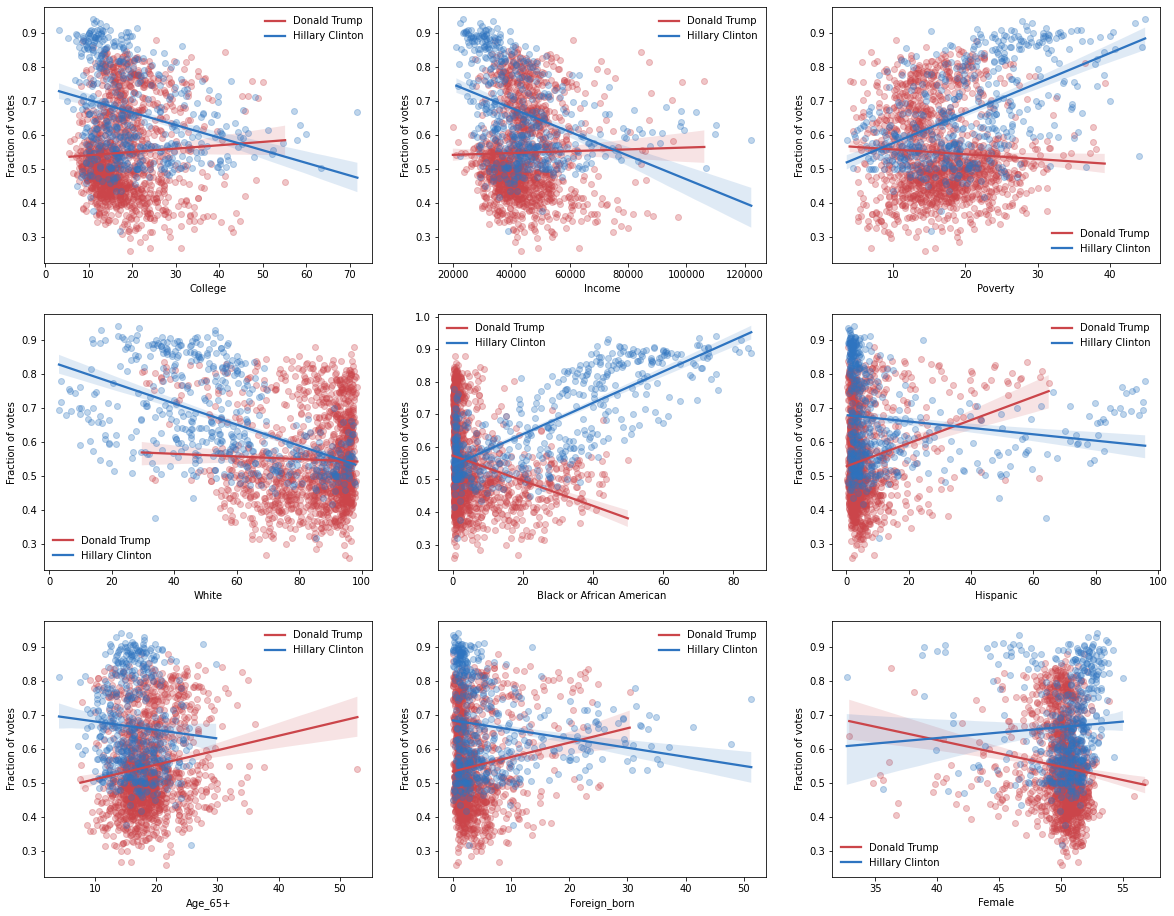

In [ ]:
columns = ['College', 'Income', 'Poverty', 'White',	'Black or African American',	
           'Hispanic', 'Age_65+', 'Foreign_born', 'Female']

fig = plt.figure(figsize=(20,16))
position = 1

for i in columns:
    plt.subplot(3, 3, position)
    plt.xlabel(i)
    sns.regplot(data = trump_won, x = i, y = 'fraction_votes', scatter_kws={'alpha':0.3})
    sns.regplot(data = hillary_won, x = i, y = 'fraction_votes', scatter_kws={'alpha':0.3})
    plt.ylabel('Fraction of votes')
    plt.legend(labels=['Donald Trump', 'Hillary Clinton'], frameon=False)
    position += 1

### Demographics in states where candidates won

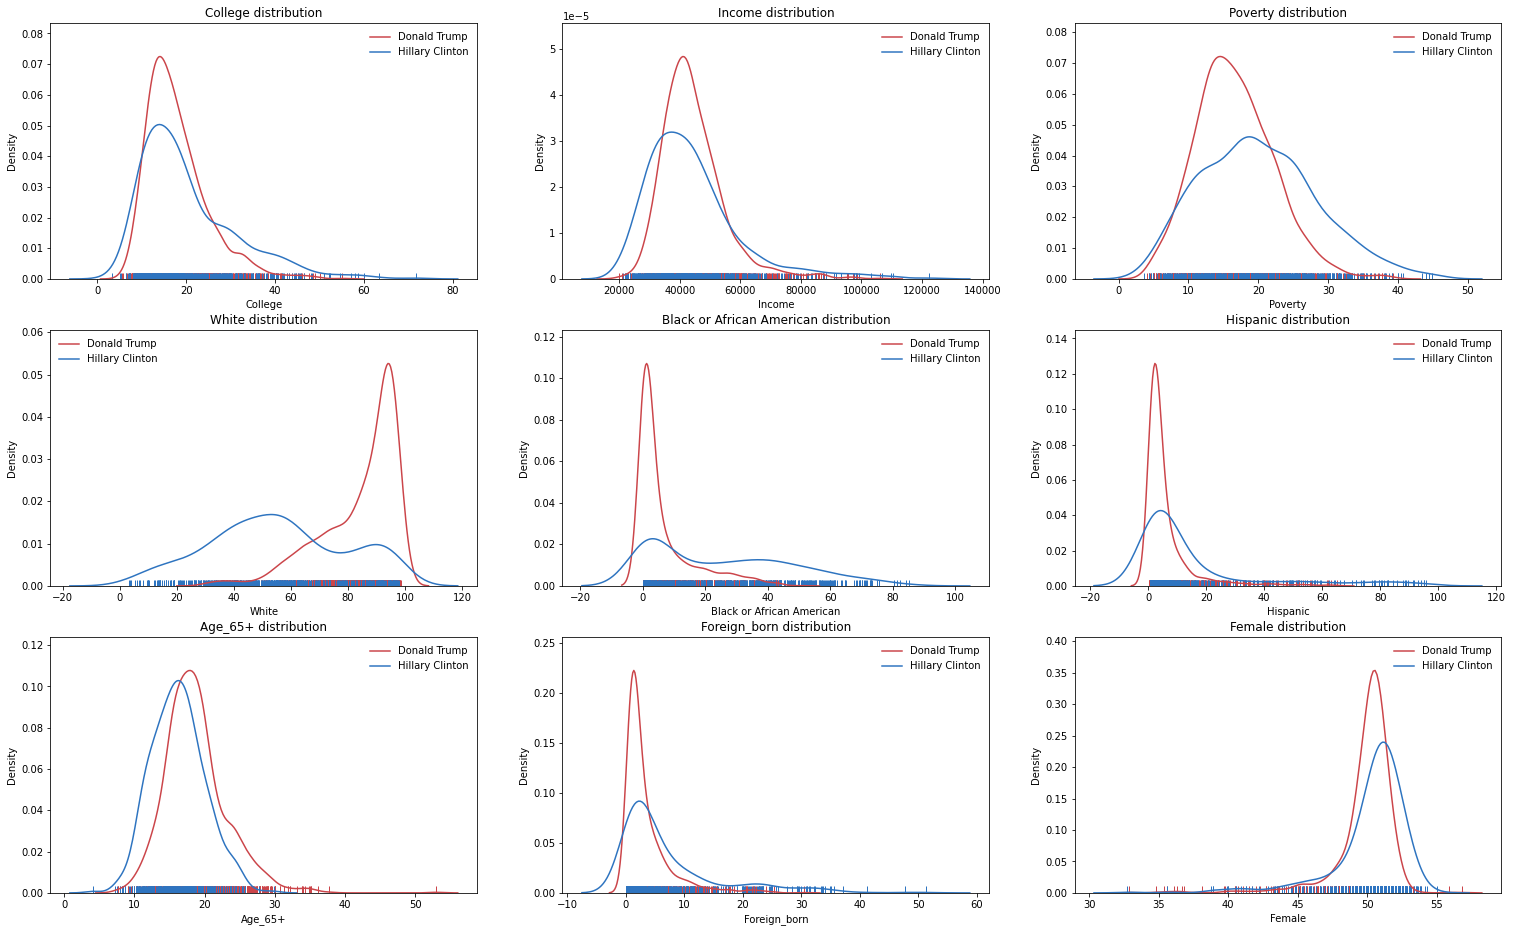

In [ ]:
columns = ['College', 'Income', 'Poverty', 'White',	'Black or African American',	
           'Hispanic', 'Age_65+', 'Foreign_born', 'Female']

fig = plt.figure(figsize=(26,16))
position = 1

for i in columns:
    plt.subplot(3, 3, position)
    plt.title('{} distribution'.format(i))
    plt.xlabel(i)
    sns.distplot(trump_won[i], hist=False, rug=True)
    sns.distplot(hillary_won[i], hist=False, rug=True)
    plt.legend(labels=['Donald Trump', 'Hillary Clinton'], frameon=False)
    position += 1

plt.show()

### Difference of average demographics in states where candidates won

In [ ]:
h_all_mean = hillary_won.median().round(2).to_frame().T
t_all_mean = trump_won.median().round(2).to_frame().T

comparison_of_tops = pd.concat([t_all_mean, h_all_mean], axis=0)
comparison_of_tops['candidate'] = ['Donald Trump', 'Hillary Clinton']
comparison_of_tops

,votes,fraction_votes,fraction_total_votes,White,Black or African American,Hispanic,College,Income,Poverty,Age_65+,Foreign_born,Female,candidate
0,1998.0,0.52,0.38,89.2,2.1,2.9,16.5,42524.0,16.2,18.2,1.9,50.4,Donald Trump
0,2326.0,0.63,0.38,54.7,21.5,4.9,17.4,41339.0,19.2,16.1,3.3,50.9,Hillary Clinton


### Insights 
When all counties where candidates won are compared, patterns do not change much.   
Hillary's votes strongly negtively correlates with the fraction of white people, average college and income. Her votes increase with the fraction of black people, women and poverty level in the county.
Higher fraction of hispanic people leads to lower fraction of votes for hillary.     
Trump's votes stronlgy negatively correlates with fraction of black people and female, positively correlates with average hispanic, college, income, foreigners born.
Higher poverty slightly positively correlates with fraction of votes for Trump.  
Interesting that Hillary's votes negatively correlates with fraction of people older than 65, Trump's - positively. 

## **Statistical hypothesis testing**

#### Comparing difference between average votes in counties won between Hilary Clinton and Donald Trump  
  
  H0: x_bar(votes_hillary) = x_bar(votes_trump)  
  H1: x_bar(votes_hillary) != x_bar(votes_trump)

In [ ]:
from scipy import stats as st

h_votes = hillary_won.votes
t_votes = trump_won.votes

stat, p = st.ttest_ind(h_votes, t_votes, equal_var = False)
print('t_stat=%.3f, p_value=%.3f' % (stat, p))
if abs(stat) < 1.96:
  print('Fail to reject the null')
else: 
  print('Reject the null')

t_stat=6.193, p_value=0.000
Reject the null


Given a huge sample size, critical t-value for 95% confidence is 1.96. Our calculated absolute t_value is 6.193 and p_value is basically zero. Therefore we reject the null hypothesis and conclude that mean votes received are statsitically different among opponents. 

In [ ]:
# We can test the hypothesis by calculating ourselves, the result is identical to the one above

difference_betweeen_means = h_votes.mean() - t_votes.mean()

standard_error = np.sqrt(h_votes.var()/h_votes.shape[0] + t_votes.var()/t_votes.shape[0])

t = difference_betweeen_means/standard_error
print(f'Calculated t-statistic is: {t.round(3)}')

Calculated t-statistic is: 6.193


##### 95% Confidence Incerval for difference in average votes_fractions.

In [ ]:
confidence_95 = st.norm.interval(alpha=0.95, loc = difference_betweeen_means, scale = standard_error)
confidence_95 = (round(confidence_95[0], 3), round(confidence_95[1], 3))
print('95% concfidence interval for difference between fractions:', confidence_95)

95% concfidence interval for difference between fractions: (7435.449, 14321.483)


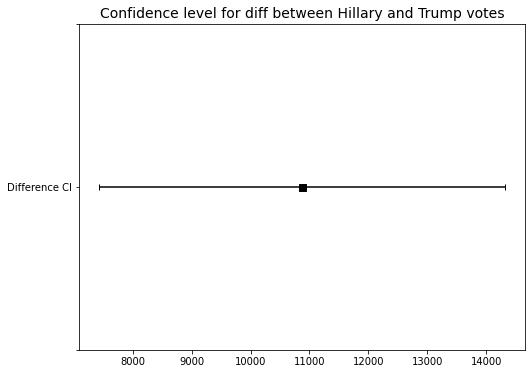

In [ ]:
x = [difference_betweeen_means]
y = [1]
error = [1.96*standard_error]

plt.figure(figsize=(8,6))
plt.errorbar(x, y, xerr=error, color = 'black', capsize=3, marker = 's', markersize = 7, mfc = 'black', mec='black')
plt.title('Confidence level for diff between Hillary and Trump votes', size=14)
plt.yticks((0,1,2), ('', 'Difference CI', ''))
plt.show()

We can see that during another identical elections, the diffrence between average Hillary votes and average Trump votes would be between [7435 : 14321] 

#### Testing other assumptions 



It is sometimes assumed that Trump supporters have a lower income and lack of education. However, this is not very visible in the graphs presented above.   
Also, Trump called Mexicans “rapists” and “killers” - maybe hispanic and black people avoid voting for Trump? Lets see whether fraction of white, hispanic and black people statistically differs among opponents states and test all these assumptions at 95% significance level.

columns = [College, Income, White (non-Hispanic),	Black or African American,	Hispanic]

H0: x_bar(average [column] hillary) = x_bar(averge [column] trump)  
H1: x_bar(average [column] hillary) != x_bar(average [column] hillary)

In [ ]:
columns = ['College', 'Income', 'White',	'Black or African American',	'Hispanic']

for i in columns:
  stat, p = st.ttest_ind(hillary_won[i], trump_won[i], equal_var = False)
  print(i,': t_stat=%.3f, p_value=%.3f' % (stat, p))
  if abs(stat) < 1.96:
    print('Fail to reject the null')
    print("\n")
  else: 
    print('Reject the null')
    print("\n")

College : t_stat=4.600, p_value=0.000
Reject the null


Income : t_stat=-0.345, p_value=0.730
Fail to reject the null


White : t_stat=-25.344, p_value=0.000
Reject the null


Black or African American : t_stat=18.052, p_value=0.000
Reject the null


Hispanic : t_stat=8.571, p_value=0.000
Reject the null




We can see that that calculated absolute t_value is higher than 1.96 and p_value exeeds 0.05 for college, white, black and hispanic groups.  
We **reject the null hypotheses** at 95% and conclude that average of College, as well as averages of White, Hispanic and Black people are statistically different among canidates supporters. Hillary has statisticaly higher average fraction of Black and Hispanic voters as well as more educated voters. However, the fraction of White voters is statistically lower for Hillary. 

We **fail to reject** the null for Income group, because calculated t-value is smaller than 1.96 and cannot conclude that average income of voters is different among the candidates.


## **Modeling**

### Data visualization using dimesionality reduction algorithms

In [ ]:
# Data for PCA and k-means
candidates = ['Donald Trump', 'Hillary Clinton']
two_winners = combined_winners.loc[combined_winners['candidate'].isin(candidates)]

features = ['votes', 'fraction_votes', 'White',	'Black or African American',	'Hispanic',	
            'College',	'Income',	'Poverty',	'Age_65+',	'Foreign_born',	'Female']

x = two_winners.loc[:, features].values

y = two_winners.candidate

#### PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)

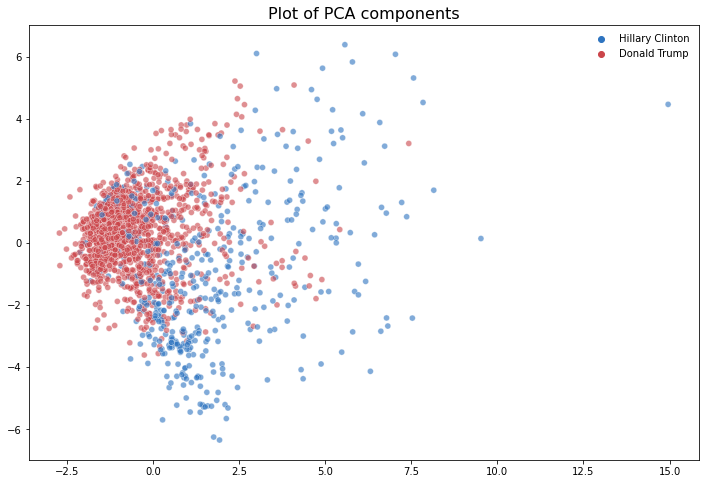

In [ ]:
colors = ["#2E74C0", "#CB454A"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(12,8))
sns.scatterplot(
    x=principalComponents[:, 0], y=principalComponents[:, 1],
    hue=two_winners.candidate, legend="full", alpha=0.6)
plt.title('Plot of PCA components', size=16)
plt.legend(frameon=False)
plt.show()

In [ ]:
print(f'Explained variance by two components: {round(sum(pca.explained_variance_ratio_),2)}')

Explained variance by two components: 0.54


#### Cumulative explained variance graph


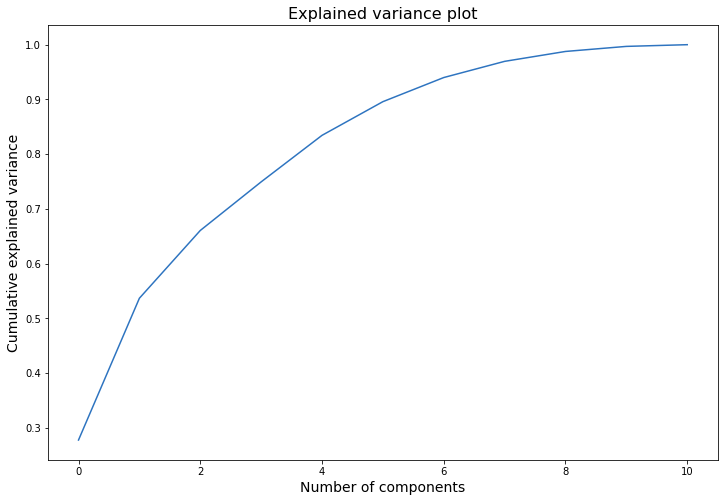

In [ ]:
plt.figure(figsize=(12,8))
pca = PCA().fit(x_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained variance plot', size=16)
plt.xlabel('Number of components', size=14)
plt.ylabel('Cumulative explained variance', size=14)
plt.show()

We can see that even though around 50% of information was lost after dimentionality reduction, our data still shows some separability between the candidates.   
Also, with only 6 components we could have more than 90% of information maintained.

#### Cluster analysis

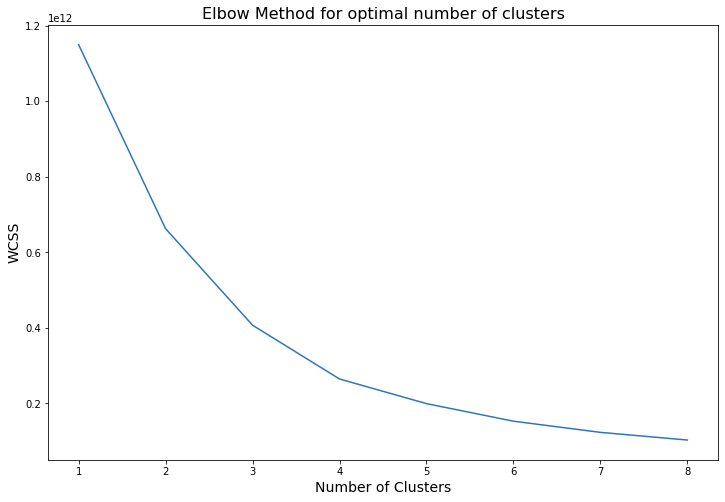

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,9):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(1,9), wcss)
plt.title('Elbow Method for optimal number of clusters', size=16)
plt.xlabel('Number of Clusters', size=14)
plt.ylabel('WCSS', size=14)
plt.show()

We can see that elbow graph becomes way less steep after third cluster, therefore fot the further analysis I will use number of cluster = 3.

 Data has different scales, threfore we use MinMaxScaler before clustering


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)

kmeans = KMeans(n_clusters = 3, random_state=0)
y_kmeans = kmeans.fit_predict(scaled)

Adding cluster number to the prior dataset

In [ ]:
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

two_winners.reset_index(drop=True, inplace=True)
kmeans.reset_index(drop=True, inplace=True)

df_cluster = pd.concat([two_winners, kmeans], axis=1)
df_cluster.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fraction_total_votes,White,Black or African American,Hispanic,College,Income,Poverty,Age_65+,Foreign_born,Female,k_cluster
0,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,0.417670,46.6,47.6,4.5,13.4,32911,26.7,16.5,2.9,46.6,2
1,Alabama,AL,Bullock,Democrat,Hillary Clinton,2451,0.913,0.773186,22.1,70.1,7.5,12.5,32033,21.6,14.9,5.4,45.3,2
2,Alabama,AL,Butler,Democrat,Hillary Clinton,2196,0.921,0.399563,53.1,44.0,1.2,14.0,29918,28.4,18.0,0.8,53.6,2
3,Alabama,AL,Chambers,Democrat,Hillary Clinton,2899,0.886,0.378855,56.8,39.5,2.0,11.8,32402,24.1,18.3,1.1,52.3,2
4,Alabama,AL,Choctaw,Democrat,Hillary Clinton,1772,0.802,0.430306,56.1,42.4,0.8,11.8,33941,21.5,20.8,0.3,52.5,2


Comparison of mean demographics between clusters


In [ ]:
df_cluster.groupby(['k_cluster'])['White', 'Black or African American', 'Hispanic', 
                                  'College', 'Income', 'Age_65+'].median().round(2)

,White,Black or African American,Hispanic,College,Income,Age_65+
k_cluster,,,,,,
0,90.90,1.70,2.8,17.05,43501,18.4
1,45.95,3.95,37.4,19.45,46952,14.1
2,53.40,38.45,3.4,13.65,34817,16.0


Filtering clusters, naming them by their specifics


In [ ]:
white = df_cluster.loc[df_cluster['k_cluster'] == 0.0]
hispanic = df_cluster.loc[df_cluster['k_cluster'] == 1.0]
black = df_cluster.loc[df_cluster['k_cluster'] == 2.0]

Clusters separability by ploting demographics densities in clusters

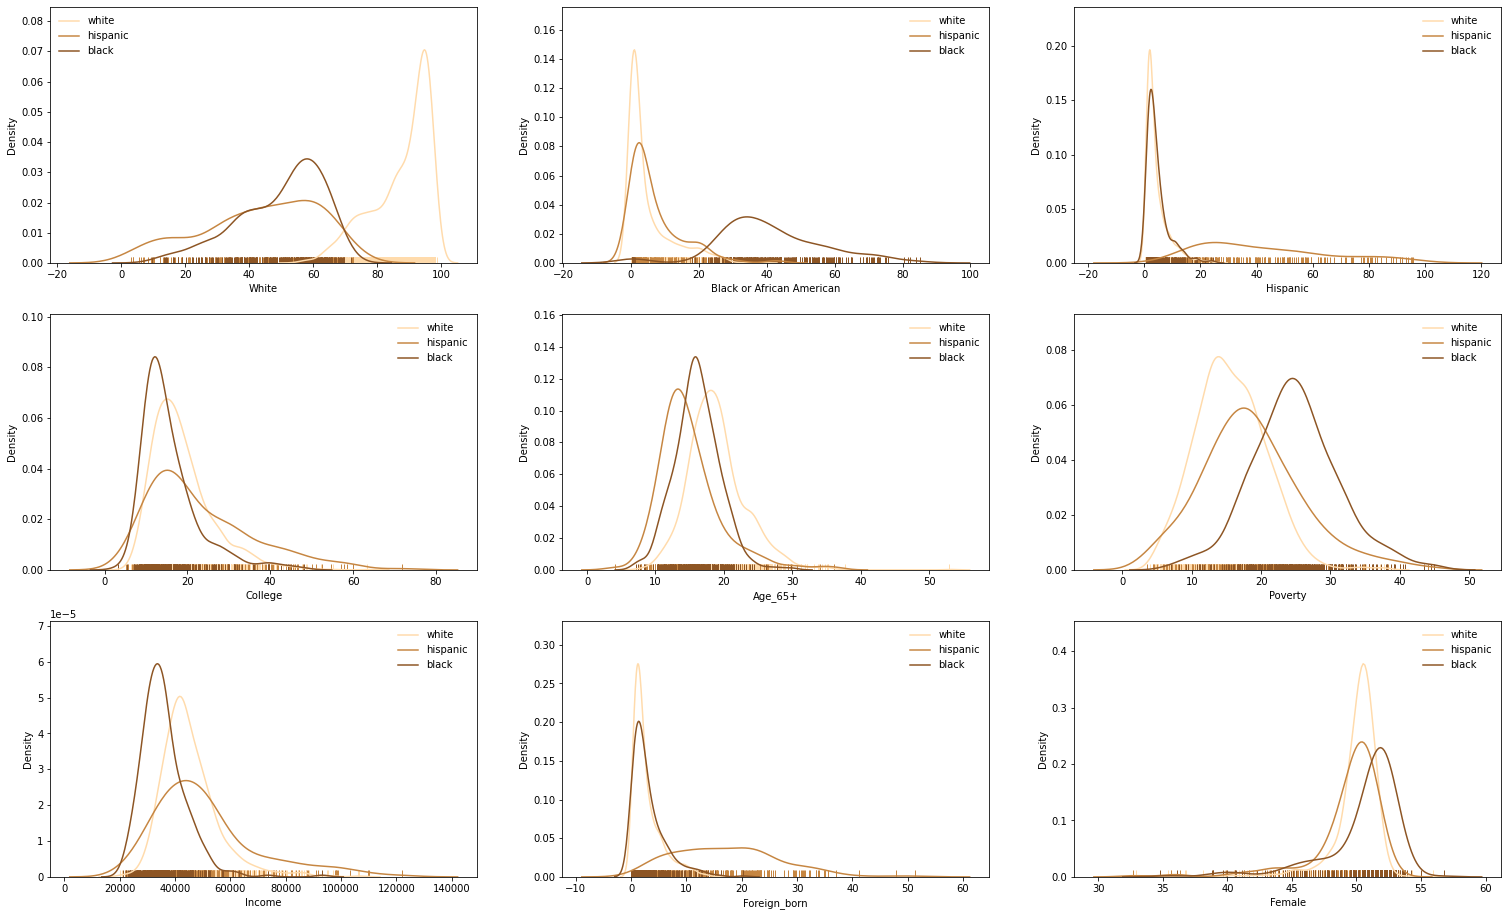

In [ ]:
colors = ["#FFDBAC", "#C68642", "#8D5524"]
sns.set_palette(sns.color_palette(colors))

fig = plt.figure(figsize=(26,16))
columns = ['White',	'Black or African American',	'Hispanic',	'College',	'Age_65+', 'Poverty', 'Income', 'Foreign_born', 'Female']
position=1

for i in columns:
    plt.subplot(3, 3, position)
    plt.xlabel(i)
    sns.distplot(white[i], hist=False, rug=True)
    sns.distplot(hispanic[i], hist=False, rug=True)
    sns.distplot(black[i], hist=False, rug=True)
    plt.legend(labels=['white', 'hispanic', 'black'], frameon=False)
    position += 1

plt.show()

The data we have can be easily grouped into three clusters based on skin color.   
Those cluster are different:   
- average income is highest in hispanic group, lowest - in black. 
- poverty lever is highest among black people, and lowest among whites.
- whites cluster has highest nuber of older people 
- hispanic cluster has most of the foreign born people

In [ ]:
# One hot encoding the clusters and joining with prior data for further analysis
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df_cluster[['k_cluster']]).toarray())
encoded_df = df_cluster.join(enc_df)
encoded_df = encoded_df.drop(columns=['k_cluster'])
encoded_df.rename(columns = {0: 'white_cluster',
                             1: 'hispanic_cluster',
                             2: 'black_cluster'}, inplace = True)
encoded_df.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fraction_total_votes,White,Black or African American,Hispanic,College,Income,Poverty,Age_65+,Foreign_born,Female,white_cluster,hispanic_cluster,black_cluster
0,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,0.417670,46.6,47.6,4.5,13.4,32911,26.7,16.5,2.9,46.6,0.0,0.0,1.0
1,Alabama,AL,Bullock,Democrat,Hillary Clinton,2451,0.913,0.773186,22.1,70.1,7.5,12.5,32033,21.6,14.9,5.4,45.3,0.0,0.0,1.0
2,Alabama,AL,Butler,Democrat,Hillary Clinton,2196,0.921,0.399563,53.1,44.0,1.2,14.0,29918,28.4,18.0,0.8,53.6,0.0,0.0,1.0
3,Alabama,AL,Chambers,Democrat,Hillary Clinton,2899,0.886,0.378855,56.8,39.5,2.0,11.8,32402,24.1,18.3,1.1,52.3,0.0,0.0,1.0
4,Alabama,AL,Choctaw,Democrat,Hillary Clinton,1772,0.802,0.430306,56.1,42.4,0.8,11.8,33941,21.5,20.8,0.3,52.5,0.0,0.0,1.0


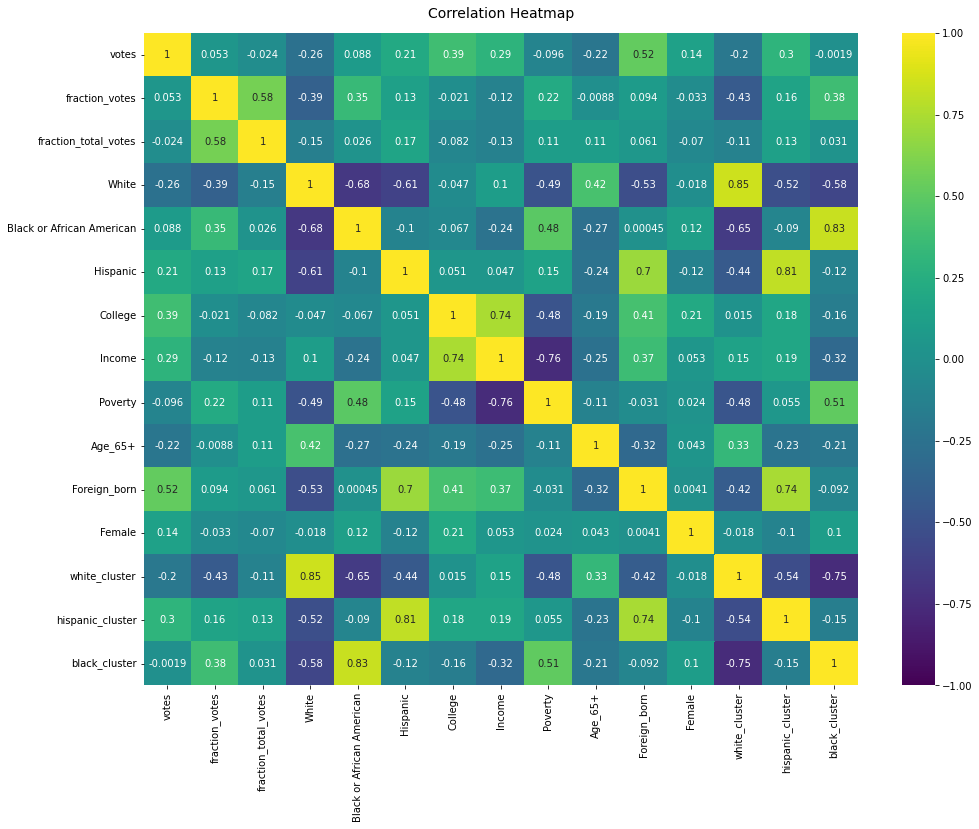

In [ ]:
plt.figure(figsize=(16,12))

heatmap = sns.heatmap(encoded_df.corr(), vmin=-1,vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=15)
plt.show()

Correlation heatmap proves that clusters are really separated based on the skin color. All three clusters have correlation higher than 0.80 with skin color of that cluster.  
We can also see the results from previous distribution plots are visible here too - poverty is correlated with black cluster, foreign born with hispanic.
Also, hispanic cluster has the highest average income, but we can also see that some weak positive correlation exist between hispanic cluster and education, income. Therefore some causal relationship might exist there.  

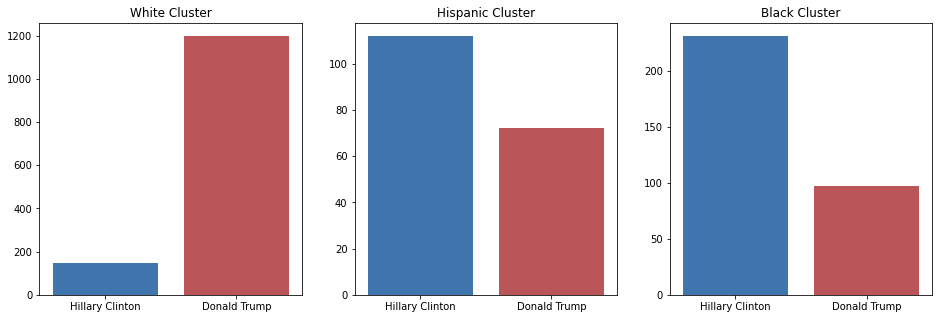

In [ ]:
colors = ["#2E74C0", "#CB454A"]
sns.set_palette(sns.color_palette(colors))

datasets = [white, hispanic, black]
white.name = 'White'
hispanic.name = 'Hispanic'
black.name = 'Black'

fig = plt.figure(figsize=(16,5))
position = 1 

for i in datasets:
    plt.subplot(1, 3, position)
    sns.countplot(x='candidate', data=i)
    plt.title(f'{i.name} Cluster')
    plt.xlabel('')
    plt.ylabel('')
    position += 1

### Insights  
The data we have can be easily grouped into three clusters based on skin color.   
Those cluster are different:   
- average income is highest in hispanic group, lowest - in black. 
- poverty lever is highest among black people, and lowest among whites. 
- white people on average has more older people compared to hispanic and black groups.  Positive correlation between whites cluster and age_65+ proves it.
- whites are negatively correlated with foreign_born while hisanics - strongly positively.
Regarding candiate supported, we see that Donald Trump won in counties where most of the white poeple live while Hillary - in black counties.  

### Linear Model

In [ ]:
df_regression = two_winners.drop(columns=['state', 'state_abbreviation', 'county', 'party'])
df_regression.head()

,candidate,votes,fraction_votes,fraction_total_votes,White,Black or African American,Hispanic,College,Income,Poverty,Age_65+,Foreign_born,Female
0,Hillary Clinton,2567,0.906,0.417670,46.6,47.6,4.5,13.4,32911,26.7,16.5,2.9,46.6
1,Hillary Clinton,2451,0.913,0.773186,22.1,70.1,7.5,12.5,32033,21.6,14.9,5.4,45.3
2,Hillary Clinton,2196,0.921,0.399563,53.1,44.0,1.2,14.0,29918,28.4,18.0,0.8,53.6
3,Hillary Clinton,2899,0.886,0.378855,56.8,39.5,2.0,11.8,32402,24.1,18.3,1.1,52.3
4,Hillary Clinton,1772,0.802,0.430306,56.1,42.4,0.8,11.8,33941,21.5,20.8,0.3,52.5


In [ ]:
# modeling logistic regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

le = LabelEncoder()

X = df_regression.loc[:,['White',	'Black or African American',	'Hispanic',	
            'College',	'Income',	'Poverty',	'Age_65+',	'Foreign_born',	'Female']].values

y = df_regression.candidate 

# encoding dependent variable, asking to return categorical values after modeling
np.all(le.fit_transform(y) == np.unique(y, return_inverse=True)[1])

# spliting the data, training regression
X_train,X_test,y_train,y_test=train_test_split(StandardScaler().fit_transform(X), y,
                                               test_size=0.2, random_state=0)

reg = LogisticRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

In [ ]:
print(f'The accuracy score of regression: {reg.score(X_test, y_test).round(2)}')

The accuracy score of regression: 0.91


#### Data frame of actual and predicted candidates

In [ ]:
results = pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})
results.head(20)

,predictions,actual
1070,Donald Trump,Donald Trump
473,Donald Trump,Donald Trump
1023,Donald Trump,Donald Trump
745,Donald Trump,Donald Trump
53,Donald Trump,Donald Trump
1052,Donald Trump,Donald Trump
1192,Donald Trump,Donald Trump
18,Hillary Clinton,Hillary Clinton
996,Donald Trump,Donald Trump
795,Hillary Clinton,Hillary Clinton


We can see that our model has 91% accuracy to predict which candidate wins the county based on the demographical properties of the county - thats a great result!

### Suggestions / steps for Democrats

When comparing Republicans and Democrats candidates in the final elections, Hillary Clinton had a really great support from black, hispanic, younger and female groups. This might be explained by the rasistic expressions of Trump and anti-abortion policies of republicans. Also, it is natural that women wants to see a non-male president sitting in the Oval office.    
However, Hispanic people which Trump once called “rapists” and “killers” really support Trump. There is also a positive relation between fraction of people born abroad and Trump's votes received. 
Knowing this, democrats should:  
- try to **attract hispanic and abroad born people votes** by finding out what drives Latinos to support Trump. Reminding people rasistic expressions of Trump mighr help. Also, Hillary has a strong support from black - it can be used to create an image of minorities-supporting democrat candidate. 
- **maintain the support from female and black** people.
- **maintain suport from younger people** and try to get more votes from older people.
- even tough hardly possible, try to **steal some white people votes from Trump**.
- use all these suggestions above especially in swing states (not covered here), because the final result depends on those states.

